<a href="https://colab.research.google.com/github/mhdkhairul19/Praktikum-Data-Mining/blob/Materi-4/Praktikum_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
columns = ["sepal-length", "sepal-width", "petal-length",
"petal-width", "class"]
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=columns)
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Eksplorasi Data

In [29]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


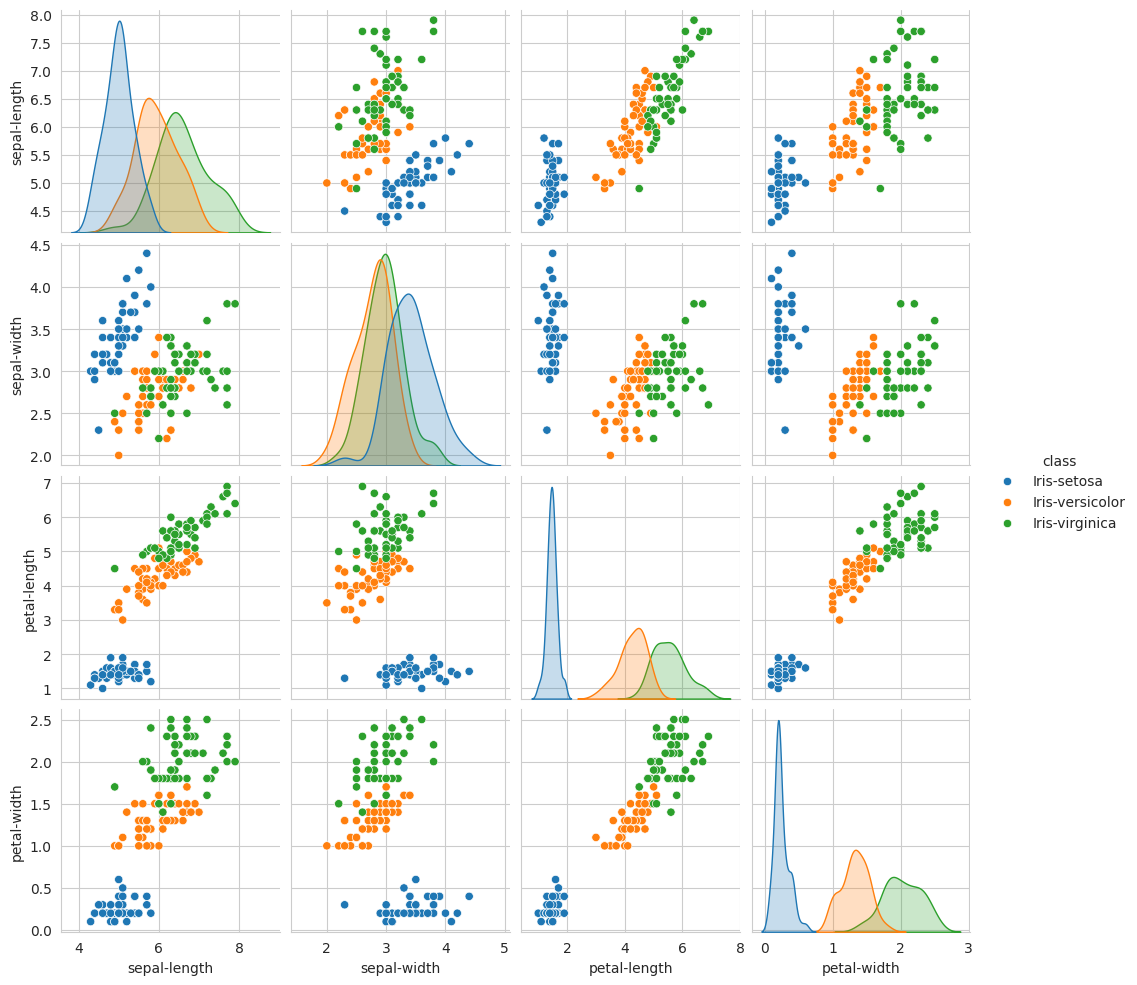

In [30]:
# plot grafik scatter matrix
sns.pairplot(df, hue='class')

Preprocessing Data

In [31]:
#Memisal Fitur dan Label
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [32]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,shuffle=True, stratify=y, random_state=42)

In [33]:
#Label Encoding
lb = LabelEncoder()
lb.fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [34]:
#Standarisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Membentuk Model

In [35]:
#Kernel linear

model1 = svm.SVC(kernel='linear')

#training model pakai data train
model1.fit(X_train, y_train)

#prediksi data testing pake model yang dibuat
y_pred = model1.predict(X_test)
print(y_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [36]:
#Kernel RBF

model2 = svm.SVC(kernel='rbf')

#training model pakai data train
model2.fit(X_train, y_train)

#prediksi data testing pake model yang dibuat
y_pred2 = model2.predict(X_test)
print(y_pred2)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


In [37]:
#Kernel polinomial

model3 = svm.SVC(kernel='poly')

#training model pakai data train
model3.fit(X_train, y_train)

#prediksi data testing pake model yang dibuat
y_pred3 = model3.predict(X_test)
print(y_pred3)

[0 1 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 1 2 1 1 0 2 0]


Evaluasi Model

In [38]:
#Kernel Linear
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [39]:
#Kernel RBF
print(confusion_matrix(y_test, y_pred2))

print(classification_report(y_test, y_pred2))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [40]:
#Kernel Polinomial
print(confusion_matrix(y_test, y_pred3))

print(classification_report(y_test, y_pred3))

[[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



Perbandingan performa

In [41]:
from sklearn.metrics import accuracy_score, log_loss
classifiers=[
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    svm.SVC(kernel='poly'),
]

#Logging for visual comparison
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log=pd.DataFrame(columns=log_cols)

for clf in classifiers:
  clf.fit(X_train, y_train)
  name= clf.__class__.__name__

  print("="*30)
  print(name)

  print('****Results****')
  train_predictions = clf.predict(X_test)
  acc=accuracy_score(y_test, train_predictions)
  print("Accuracy: {:.4%}".format(acc))

  log_entry=pd.DataFrame([[name, acc*100,11]], columns=log_cols)
  log= log.append(log_entry)

  print("="*30)

SVC
****Results****
Accuracy: 100.0000%
SVC
****Results****
Accuracy: 96.6667%
SVC
****Results****
Accuracy: 90.0000%


<ipython-input-41-f2e68ddddf28>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log= log.append(log_entry)
<ipython-input-41-f2e68ddddf28>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log= log.append(log_entry)
<ipython-input-41-f2e68ddddf28>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log= log.append(log_entry)


Visualisasi perbandingan performa

<ipython-input-42-c19e14bfc094>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=accuracy, palette='magma')


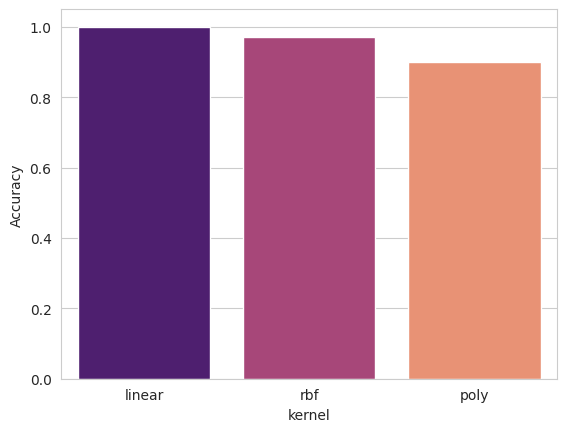

In [42]:
kernels = ['linear', 'rbf', 'poly']
accuracy = [1, 0.97, 0.90]
#create barplot
sns.set_style("whitegrid")
sns.barplot(x=kernels, y=accuracy, palette='magma')
#set labels
plt.xlabel("kernel")
plt.ylabel("Accuracy")
#show plot
plt.show()